# Prosper Loan Data Exploration
## by Agugua Urenna Onome

## Introduction

This document explores a dataset containing 113,937 loans with 81 variables on each loan, including details on the loan such as loan amount, loan origination date, estimated returns, borrower rate (or interest rate), current loan status, loan rating; Details on the borrower such as borrowers' occupation, borrowers' income, employment status and many others


## Table of Contents

* [Preliminary Wrangling](#chapter1)
* [Univariate Exploration](#chapter2)
* [Bivariate Exploration](#chapter3)
* [Multivariate Exploration](#chapter4)
* [Conclusion](#chapter5)

## Preliminary Wrangling <a class="anchor" id="chapter1"></a>

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# load the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of data shape and composition

print(df.shape)
print(df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [4]:
#Creating a subset of the original dataframe 

loans = df[['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',
          'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
           'EmploymentStatus', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'IncomeRange', 
           'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]

In [5]:
# converting features into the appropriate data types 

loans['ListingNumber'] = loans['ListingNumber'].astype('str')
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype('category')
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])
loans['Term'] = loans['Term'].astype('category')

In [6]:
# creating a new year column from LoanOriginationDate
loans['LoanOriginationYear']= pd.DatetimeIndex(loans['LoanOriginationDate']).year

# converting the datatype to category
loans['LoanOriginationYear'] = loans['LoanOriginationYear'].astype('category')

# dropping the LoanOriginationDate column
loans.drop('LoanOriginationDate', axis =1, inplace=True)

In [7]:
# convert into ordered categorical types

ordinal_var_dict = {'ProsperRating (Alpha)': [ 'N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [8]:
# descriptive statistics for numeric variables

loans.describe()

,BorrowerAPR,BorrowerRate,EstimatedReturn,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113912.000000,113937.000000,84853.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,0.218828,0.192764,0.096068,0.275947,5.608026e+03,8337.01385,272.475783
std,0.080364,0.074818,0.030403,0.551759,7.478497e+03,6245.80058,192.697812
min,0.006530,0.000000,-0.182700,0.000000,0.000000e+00,1000.00000,0.000000
25%,0.156290,0.134000,0.074080,0.140000,3.200333e+03,4000.00000,131.620000
50%,0.209760,0.184000,0.091700,0.220000,4.666667e+03,6500.00000,217.740000
75%,0.283810,0.250000,0.116600,0.320000,6.825000e+03,12000.00000,371.580000
max,0.512290,0.497500,0.283700,10.010000,1.750003e+06,35000.00000,2251.510000


In [9]:
# checking the corrected datatypes

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingNumber              113937 non-null  object  
 1   Term                       113937 non-null  category
 2   LoanStatus                 113937 non-null  object  
 3   BorrowerAPR                113912 non-null  float64 
 4   BorrowerRate               113937 non-null  float64 
 5   EstimatedReturn            84853 non-null   float64 
 6   ProsperRating (Alpha)      84853 non-null   category
 7   ProsperScore               83397 non-null   category
 8   ListingCategory (numeric)  113937 non-null  category
 9   BorrowerState              108422 non-null  object  
 10  Occupation                 110349 non-null  object  
 11  EmploymentStatus           111682 non-null  object  
 12  IsBorrowerHomeowner        113937 non-null  bool    
 13  DebtToIncomeRa

In [10]:
# check for unique entries

columns = ['Term', 'LoanStatus','ProsperScore', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
           'IsBorrowerHomeowner', 'IncomeRange', 'LoanOriginationYear', 'Occupation']
def find_unique():
    for col in columns:
        print(loans[col].unique())
        
find_unique()

[36, 60, 12]
Categories (3, int64): [12, 36, 60]
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
[NaN, 7, 9, 4, 10, ..., 8, 5, 3, 6, 1]
Length: 11
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
[NaN, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR']
Categories (8, object): ['N/A' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']
[0, 2, 16, 1, 7, ..., 5, 9, 17, 10, 12]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
[ True False]
['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+', '$75,000-99,999', '$1-24,999', 'Not employed', '$0']
Categories (8, object): ['Not displayed' < 'Not employed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$1

In [11]:
# passing the past due values in the Loan Status as Defaulted

loans['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], 'Defaulted', inplace=True)

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 35 features. There are about 15, numeric variables, 15 categorical variables and 5 text variables. The  variables 'ProsperScore', 'ProsperRating (numeric)', 'ProsperRating (Alpha)' and Income Range are ordered factor variables with the following levels.

* Prosper Rating: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.
* Prosper Score: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
* Income Range : 0, 1-24999, 25000-49999, 50000-74999, 75000-99999, 100000+

### What is/are the main feature(s) of interest in your dataset?

I am most interested in the following 

* Factors that affect a loan’s outcome status
* What affects the borrower’s APR or interest rate
* If there are differences between loans depending on how large the original loan amount was

So I will be working with the Loan Status, Borrower APR/Borrower Rate and exploring every other variable likely to affect it

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features would help support my investigation
* Borrower's Annual Percentage Rate (APR)
* Borrower Rate
* Term
* Income range
* Occupation
* Debt to income ratio
* Stated Monthly Income
* Loan Status
* Original Loan Amount

These are likely to have a strong impact on the outcome of the loan and on the rate on the loan

## Univariate Exploration <a class="anchor" id="chapter2"></a>


In [12]:
def custom_plot(data, y, col, fontsize, xlabel, ylabel, title, order):
    ''' defining a function to create countplots of the distribution of categorical variables '''
    color = sns.color_palette()[0]
    sns.countplot(data =data, y=y, color=color, order = order)
    ax.set_ylabel(ylabel, fontsize = fontsize)
    ax.set_xlabel(xlabel, fontsize = fontsize)
    ax.set_title(title, fontsize = fontsize + 5)

#### Borrower States

What are the top and bottom borrower states?

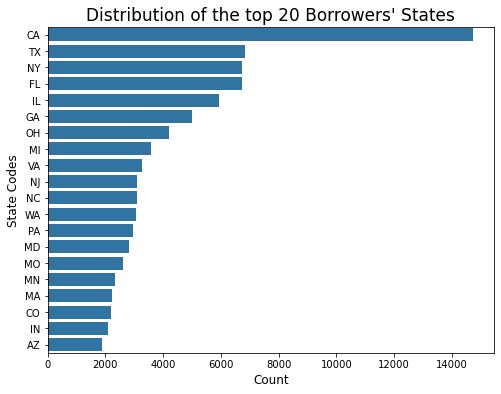

In [13]:
# Countplot showing the distribution of the top 20 borrowers' states by calling the custom_plot() function

fig, ax = plt.subplots(figsize=(8,6))
custom_plot(loans, 'BorrowerState', loans['BorrowerState'], 12, 'Count', 'State Codes', "Distribution of the top 20 Borrowers' States", loans['BorrowerState'].value_counts().iloc[:20].index)
plt.show()

* The state with the most borrowers is the state with the code CA which represents California with over 14,000 borrowers

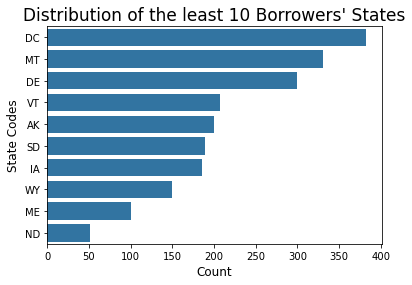

In [14]:
# Countplot showing the distribution of the least 10 borrowers' states by calling the custom_plot() function

fig, ax = plt.subplots()
custom_plot(loans, 'BorrowerState', loans['BorrowerState'], 12, 'Count', 'State Codes', "Distribution of the least 10 Borrowers' States", loans['BorrowerState'].value_counts().iloc[-10:].index)
plt.show()

* The state with the least borrowers is the state with the code ND which represents North Dakota with a little less than 50 borrowers

#### Borrower Income Range

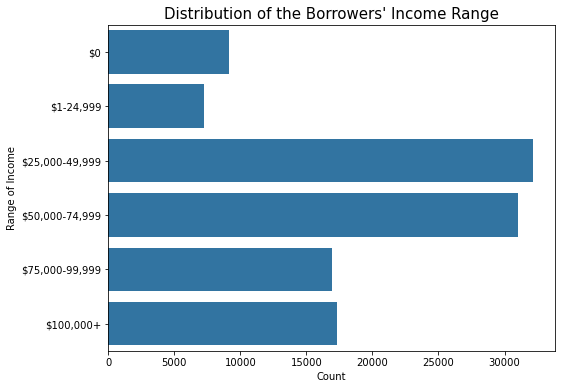

In [15]:
# Replacing the values 'Not employed' and 'Not displayed' in the income range with $0 which is a valid range 
loans['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

# Countplot showing the distribution of the range of income of the borrowers
fig, ax = plt.subplots(figsize = (8,6))
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
custom_plot(loans, 'IncomeRange', loans['IncomeRange'], 10, 'Count', 'Range of Income', "Distribution of the Borrowers' Income Range", order)
plt.show()

 The most borrowers have incomes ranging between 25,000 and 74,999 

#### Occupation

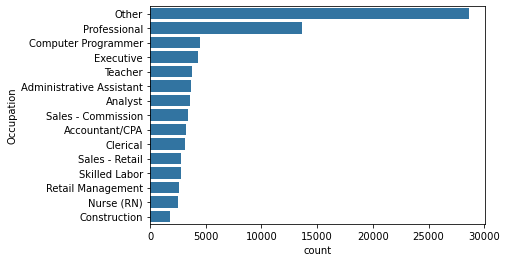

In [16]:
# countplot showing the occupation distribution
order = loans['Occupation'].value_counts().iloc[:15].index
custom_plot(loans, 'Occupation', loans['Occupation'], 12, 'Count', "Borrower's Occupation", "Distribution of the top 15 Borrowers' Occupation", order)

The highest occupation is grouped as others making it difficult to ascertain the true occupation of the borrowers. Professionals have the next top borrower count 

#### Stated Monthly Income

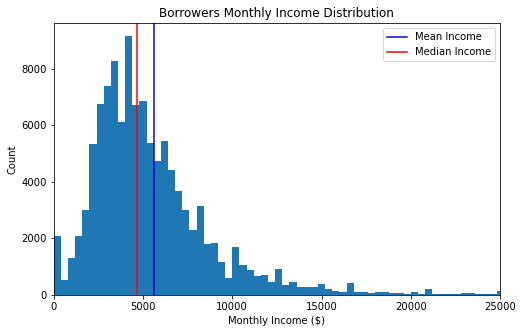

In [17]:
# A histogram showing the distribution of the borrowers' monthly stated income

binsize = 400
bins = np.arange(0, loans['StatedMonthlyIncome'].max()+ binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x ='StatedMonthlyIncome', bins=bins)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count')
plt.title('Borrowers Monthly Income Distribution')
plt.axvline(x=loans['StatedMonthlyIncome'].mean(), label = 'Mean Income', linestyle='-', color='b')
plt.axvline(x=loans['StatedMonthlyIncome'].median(), label = 'Median Income', linestyle='-', color='r')
plt.xlim([0, 25000]) #using the xlimit function to zoom in on the dense area of the distribution
plt.legend()
plt.show()

The monthly income has a long-tailed distribution which is skewed to the right, with a lot of borrowers earning between 0(no income) and 25,000, and a few on the high end. The income distribution is normal, with one peak a little below 5,000. Interestingly, the maximum income earned in the data is about 1,750,000 and it is worth investigating. Let's check out the distribution using a log scale.

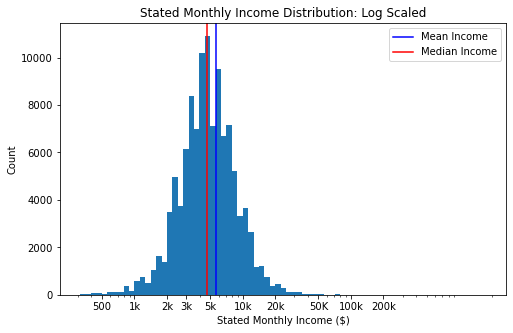

In [18]:
logbinsize = 0.05
bins = 10 ** np.arange(2.5, np.log10(loans['StatedMonthlyIncome'].max())+logbinsize, logbinsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x ='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xlabel('Stated Monthly Income ($)')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '50K', '100k', '200k'])
plt.ylabel('Count')
plt.title('Stated Monthly Income Distribution: Log Scaled')
plt.axvline(x=loans['StatedMonthlyIncome'].mean(), label = 'Mean Income', linestyle='-', color='b')
plt.axvline(x=loans['StatedMonthlyIncome'].median(), label = 'Median Income', linestyle='-', color='r')
plt.legend()
plt.show()

A bulk of the borrowers earn a monthly income between 3k and 10k with the median income a little above 5k

In [19]:
# Checking the statistical properties of the monthly incomes

loans['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [20]:
# Looking at attributes of the borrower with the maximum monthly income 

max_income = loans[loans['StatedMonthlyIncome'] == 1750002.916667]
max_income[['ListingCategory (numeric)', 'Occupation', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)', 'LoanStatus', 'IncomeRange']]

,ListingCategory (numeric),Occupation,IsBorrowerHomeowner,LoanOriginalAmount,Term,ProsperRating (Alpha),LoanStatus,IncomeRange
53167,3,Professional,True,4000,36,HR,Current,"$100,000+"


* The borrower with the  maximum salary took the loan for business reasons and is a professional but the salary is on the high side compared to what other borrowers earn. If one earns that amount on a monthly basis then why would one need to take a loan of 4,000 dollars for 36 months. 

My assumption: There was either an error in documenting this borrower's income or in documenting the loan amount taken

#### Listing Categories

In [21]:
# match numeric value to the category name

'''The numbers on the Listing category (numeric) column gives it a false sense of order so the aim is to match the 
numbers to the actual category names as given in the variable definition file'''

loans.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic Procedure", 11: "Engagement Ring", 12: "Green", 13: "Household",
                                                                14: "Large Purchase", 15: "Medical/Dental", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

loans.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

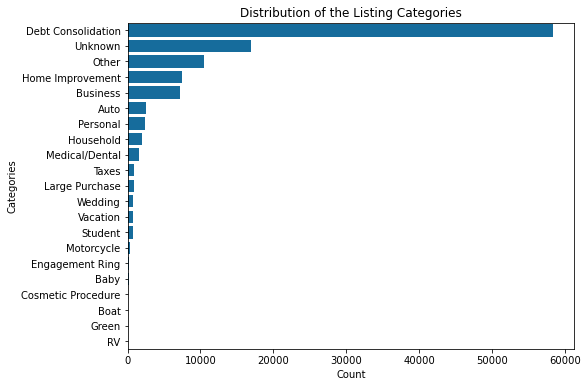

In [22]:
# countplot showing the distribution of the categories listed

plt.style.use('seaborn-colorblind')
color = sns.color_palette()[0]
order = loans['ListingCategory'].value_counts(ascending = False).index

fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(data = loans, y='ListingCategory', color = color, order = order)
ax.set_ylabel('Categories')
ax.set_xlabel('Count')
ax.set_title('Distribution of the Listing Categories')
plt.show()

Most of the borrowers took out loans for debt consolidation purpose 

#### Ordered Categorical Variables: 
##### Prosper Rating, Prosper Score and Year

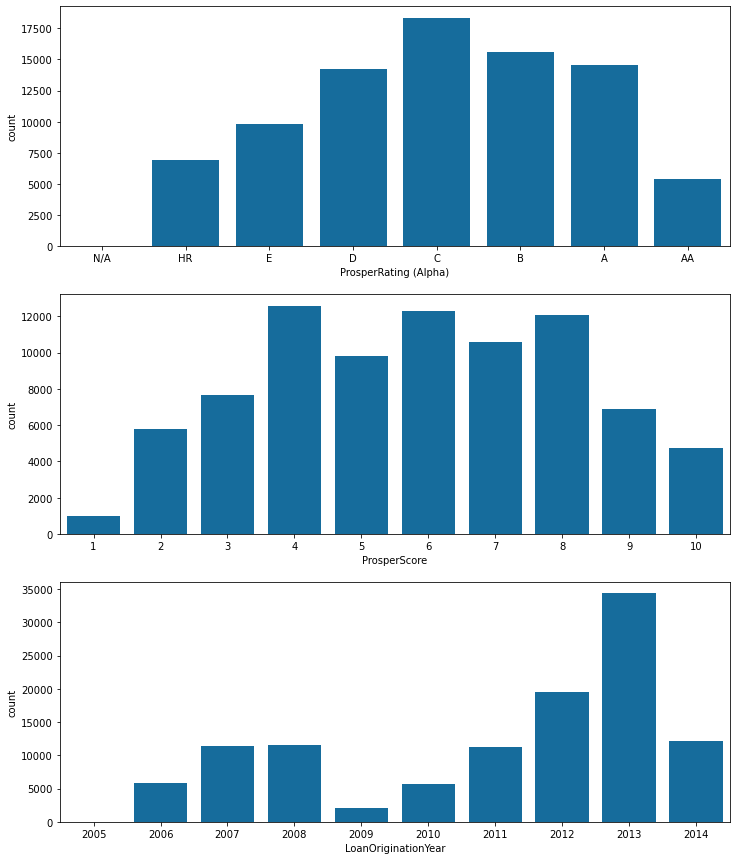

In [23]:
# plot together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,15])

default_color = sns.color_palette()[0]
sns.countplot(data = loans, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sns.countplot(data = loans, x = 'ProsperScore', color = default_color, ax = ax[1])
sns.countplot(data = loans, x = 'LoanOriginationYear', color = default_color, ax = ax[2])

plt.show()

* The most loans were taken out in 2013 with a slow rise from 2019 and a drastic reduction in 2014
* Loans with rating 'C' were mostly taken out
* Loans with scores between 4, 6 and 8 have the most count

#### Loan Term (Months) 

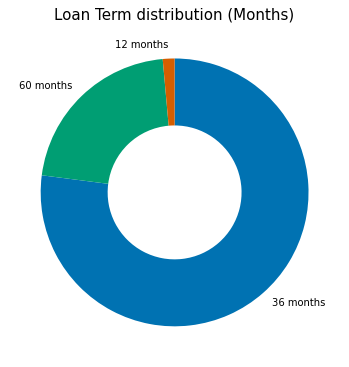

In [24]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(6,8))
x_data = loans['Term'].value_counts()
ax.pie(x_data, startangle = 90, counterclock = False, wedgeprops = {'width':0.5}, labels = ['36 months','60 months', '12 months'], labeldistance=1.1)
ax.set_title('Loan Term distribution (Months)', fontsize = 15);

* Most loans taken out have a 36 months term

#### Borrower Annual Percentage Rate (%)

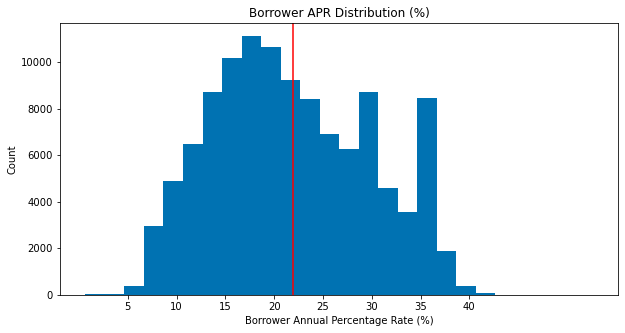

In [25]:
# Distribution of Borrower APR in percentage 
binsize = 2
APR_percentage = loans['BorrowerAPR']*100
bins = np.arange(loans['BorrowerAPR'].min()*100, loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.axvline(x=loans['BorrowerAPR'].mean()*100, label = 'Mean APR', linestyle='-', color='r')
plt.show()

* The Borrowers' APR is normally distrubuted with the peak between 15% and 20% and additional peaks in the 30% and a little over the 35% mark

#### Borrower Rate

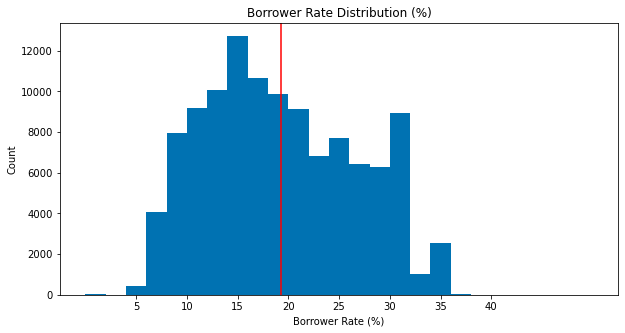

In [26]:
# Distribution of Borrower APR in percentage 
binsize = 2
APR_percentage = loans['BorrowerRate']*100
bins = np.arange(loans['BorrowerRate'].min()*100, loans['BorrowerRate'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = APR_percentage, bins = bins)
plt.title('Borrower Rate Distribution (%)')
plt.xlabel('Borrower Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.axvline(x=loans['BorrowerRate'].mean()*100, label = 'Mean Rate', linestyle='-', color='r')
plt.show()

The Borrowers' Rate is normally distrubuted with the highest peak at 15% and additional peaks at 25% and 30%

#### Loan Original Amount

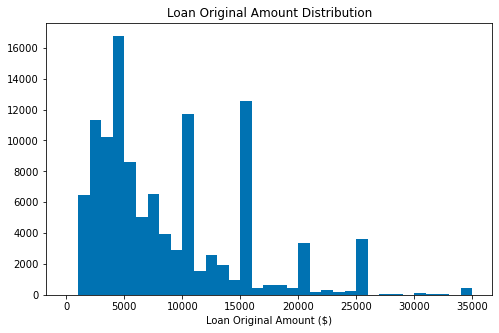

In [27]:
# Distribution of the loan original amount

binsize = 1000
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x ='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution')
plt.show()

* The distribution is long tailed and skewed to the right. Let's transform the data using the log scale.

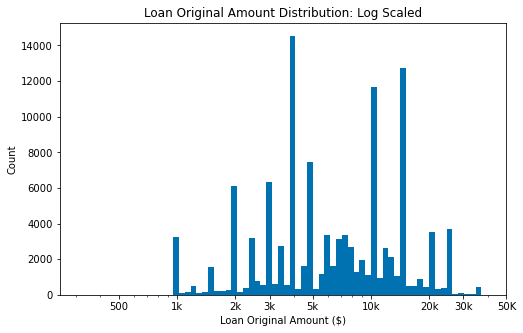

In [28]:
# Distribution of the loan original amount on a log scale

logbinsize = 0.03
bins = 10 ** np.arange(2.5, np.log10(loans['LoanOriginalAmount'].max())+logbinsize, logbinsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x ='LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xlabel('Loan Original Amount ($)')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.ylabel('Count')
plt.title('Loan Original Amount Distribution: Log Scaled')
plt.show()

* The most value for the loan amount is between 3k and 5k and there are large spikes at 10k, 15k, 20k and 20k

#### Loan Status

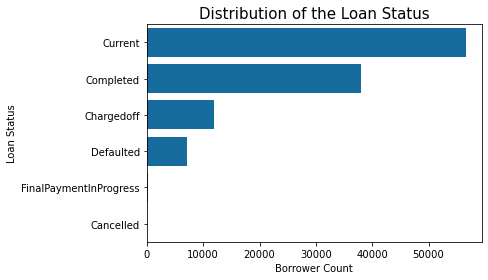

In [29]:
# countplot showing the distribution of the Loan Status by calling the custom_plot function

order = loans['LoanStatus'].value_counts(ascending=False).index
fig, ax = plt.subplots()
custom_plot(loans, 'LoanStatus', loans['LoanStatus'], 10, 'Borrower Count', 'Loan Status', 'Distribution of the Loan Status', order)

* Most of the loans are current loans but the completed loans take up a relatively high number as well

#### Monthly Loan Payments

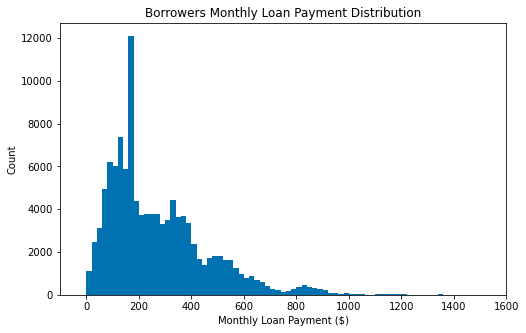

In [30]:
# A histogram showing the distribution of the borrowers' monthly loan payment

binsize = 20
bins = np.arange(0, loans['MonthlyLoanPayment'].max()+ binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x ='MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Count')
plt.title('Borrowers Monthly Loan Payment Distribution')
plt.xlim([-100, 1600]) #using the xlimit function to zoom in on the dense area of the distribution
plt.show()

Most of the borrowers payback a little as <200 dollars every month. The distribution is also skewed to the right just as the loan amount and monthly income distribution. We'll transform the data and plot it on a log scale to review the hidden values.

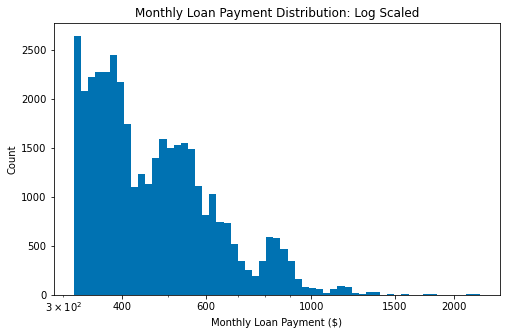

In [31]:
# Distribution of the loan original amount on a log scale

logbinsize = 0.015
bins = 10 ** np.arange(2.5, np.log10(loans['MonthlyLoanPayment'].max())+logbinsize, logbinsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x ='MonthlyLoanPayment', bins=bins)
plt.xscale('log')
plt.xlabel('Monthly Loan Payment ($)')
plt.xticks([4 * 10**2, 6 * 10**2, 1e3, 1.5e3, 2e3], ['400', '600', '1000','1500','2000'])
plt.ylabel('Count')
plt.title('Monthly Loan Payment Distribution: Log Scaled')
plt.show()

We'll explore the relationship between the monthly repayment, stated monthly income and Loan original amount later on to get more insight as to whether there's a correlation or not.

#### Debt to Income Ratio

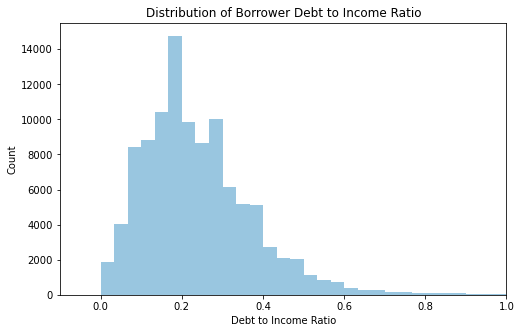

In [32]:
# distribution plot of the debt to income ratio

plt.figure(figsize = [8,5])
sns.distplot(loans['DebtToIncomeRatio'], kde = False, bins = 300)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

* From the figure, it appears that most borrowers have a 20% debt to income ratio. The distribution is also skewed to the right

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* In the Monthly Income distribution, the maximum value was unusually high and when compared to the loan amount it seemed to require more investigation unfortunately we do not have any supporting data and I assume it was a computational error
* Year 2013 had the highest loan creation. 
* California (CA) had the biggest number of loans borrowers. 
* Most loans fall in the 36 months term and they are current loans
* Most borrowers have a 20% debt to income ratio.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


* There were some features with long-tailed and skewed distributions but they were checked on a log scale to show the hidden distribution in some areas.
* I extracted the year from the loan origination date to perform analysis by year

## Bivariate Exploration <a class="anchor" id="chapter3"></a>

In this section, I will be investigating relationships between pairs of variables that have been introduced in the univariate exploration section above.

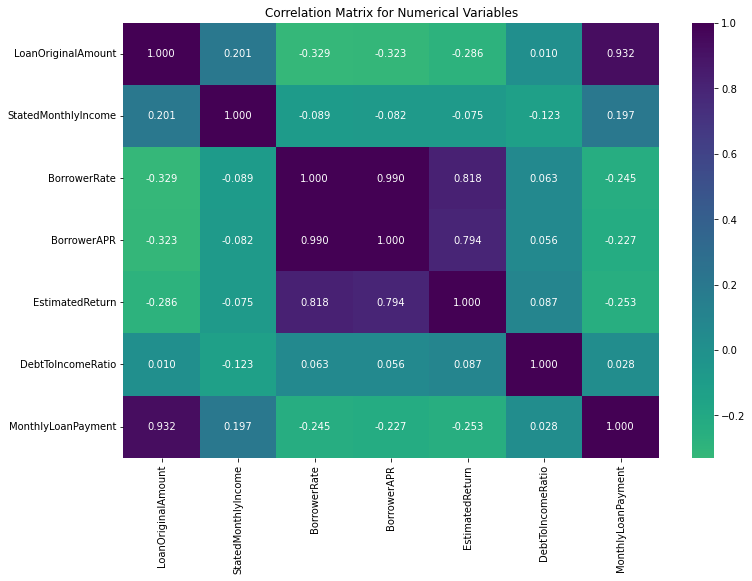

In [33]:
#Creating a list of numerical variables
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate', 'BorrowerAPR', 'EstimatedReturn','DebtToIncomeRatio', 'MonthlyLoanPayment']

# showing correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sns.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Correlation Matrix for Numerical Variables');

* The correlation between statedmonthly income and loan original amount is 0.201
* The correlation between statedmonthly income and borrower rate is -0.089.
* The correlation between Loan original amount and borrower rate is - 0.329
* The correlation between estimated return and loan original amount is -0.286
* The correlation between debt to income ratio and borrower rate is 0.063.
* The correlation between Loan original amount and debt to income ratio is 0.010
* The correlation between borrower rate and estimated return is 0.818

loans.shape= (113937, 20)
loans_samp.shape= (500, 20)


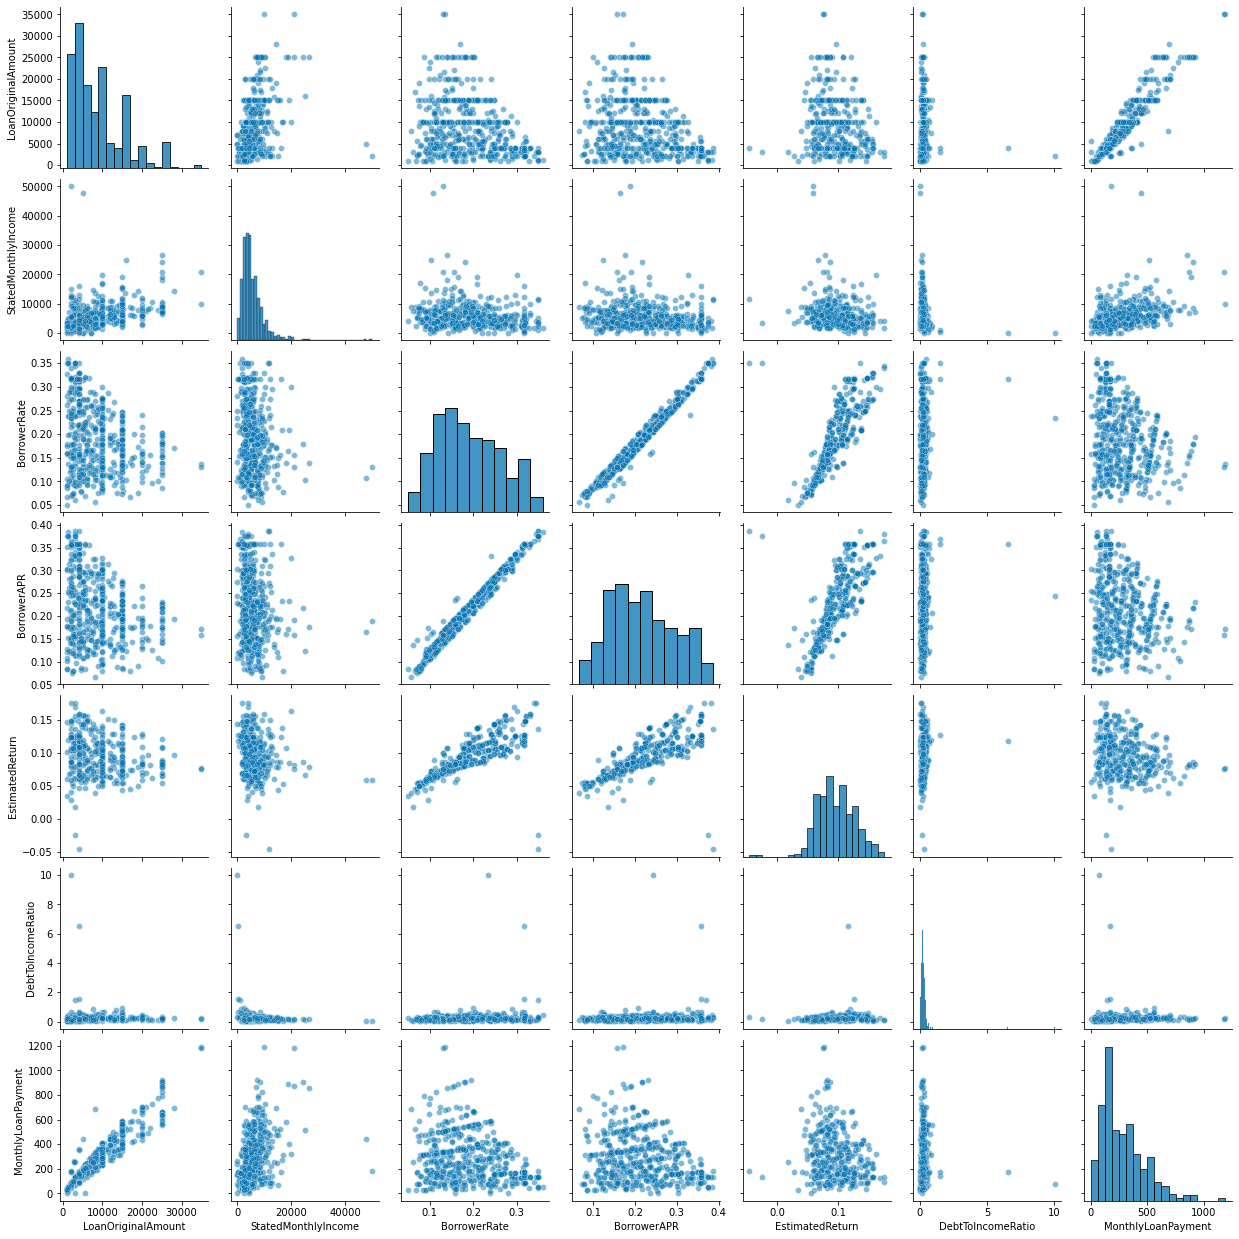

In [34]:
# plot matrix: sample 500 loans so that plots are clearer and render faster

print("loans.shape=",loans.shape)
loans_samp = loans.sample(n=500, replace = False)
print("loans_samp.shape=",loans_samp.shape)

sns.pairplot(loans_samp, vars=numeric_vars, palette='husl', plot_kws={'alpha': 0.5});

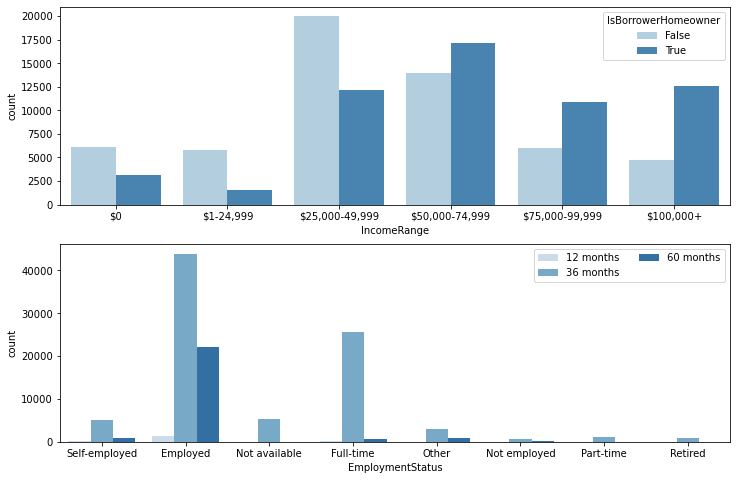

In [66]:
# Investigating the relationship between variables
plt.figure(figsize = [12, 8])
palette = 'Blues'

# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(2, 1, 1)
sns.countplot(data = loans, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = palette)

# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sns.countplot(data = loans, x = 'EmploymentStatus', hue = 'Term', palette = palette)

ax.legend(loc = 1, ncol = 2, labels=['12 months', '36 months', '60 months'])

* Borrowers with income range from ($)50,000-100,000+ are mostly homeowners
* Borrowers with full time employment take loans with 36months term
* Employed borrowers also take loans with a 36months term

### Loan Status and its relationship with other features

In [36]:
# Filter out the loan status 'Current' 

'''Since we are interested in the effect of factors on the loan status outcome, the status ('current') is not needed as it is 
 in process and there's no telling whether or not it will be completed or would end up as a default loan so it can't be used 
 for analysis. The rows with 'current' as loan status would be removed and the completed loans will be encoded as 1 while others 
 will be encoded as 0. The other's include loans that are past their due date, cancelled, defaulted and charged off'''

past = loans[loans["LoanStatus"] != "Current"]

# encoding the completed loans as 1 and others as 0

past["LoanStatus"] = np.where(past["LoanStatus"].str.contains("Completed"), 1, 0)


#### Loan Term

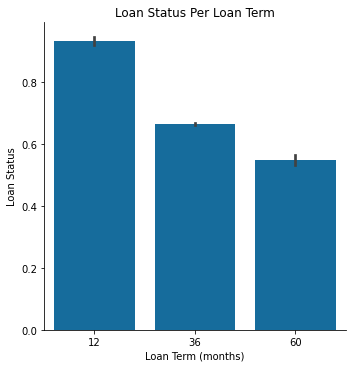

In [37]:
color= sns.color_palette()[0]
sns.catplot(data=past, y='LoanStatus', x='Term', kind='bar', color=color)
plt.title('Loan Status Per Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Loan Status');

In [38]:
# calculating the average default times per term

month12, month36, month60 = past[past['Term'] == 12], past[past['Term'] == 36], past[past['Term'] == 60]

1 - month12['LoanStatus'].mean(), 1 - month36['LoanStatus'].mean(), 1 - month60['LoanStatus'].mean()

(0.06572164948453607, 0.33451382537798446, 0.4513354459031236)

From the figure, there's some variation in the default percentage. Loans under the 12months term had defaults 6.66% of the time, loans of 36 months term had defaults 33.45% of the time while loans under the 60 months term had defaults 45.13% of the time.

#### Listing Category

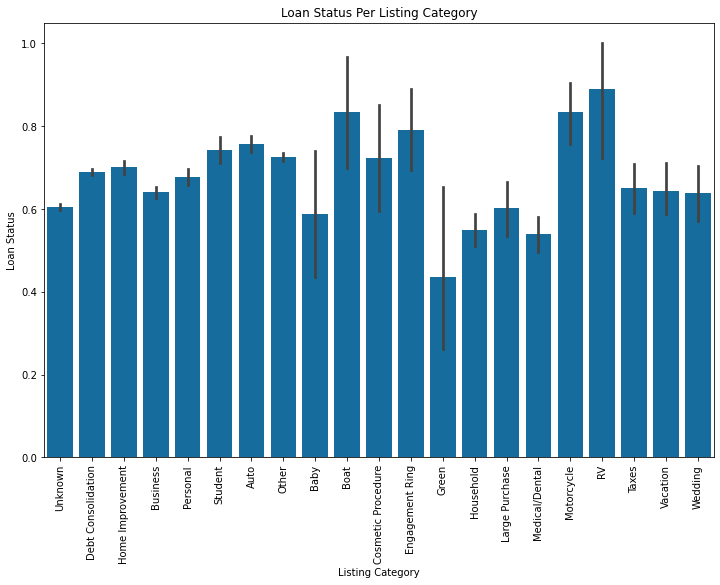

In [39]:
# Loan status per listing category
fig, ax = plt.subplots(figsize = (12, 8))

sns.barplot(data=past, y='LoanStatus', x='ListingCategory', color=color)
ax.set_title('Loan Status Per Listing Category')
ax.set_xlabel('Listing Category')
ax.set_ylabel('Loan Status')
plt.xticks(rotation=90);

plt.show()

In [40]:
# calculating the average default time for the minimum bar and maximum bar

green, rv = past[past['ListingCategory'] == 'Green'], past[past['ListingCategory'] == 'RV']

1 - green['LoanStatus'].mean(), 1 - rv['LoanStatus'].mean()

(0.5652173913043479, 0.11111111111111116)

Looking at the several loan categories, the Green loan had the most defaults of about 56.5% while the RV loan accounts for about 11.11% default times which is the least 

#### Monthly Income and Debt to income ratio

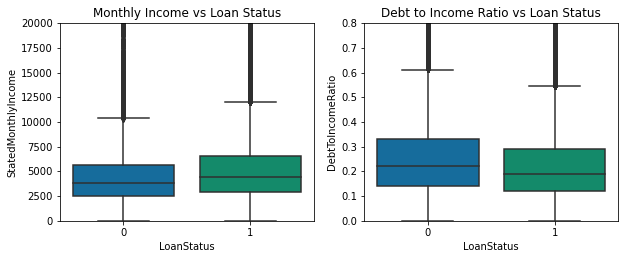

In [41]:
fig= plt.figure(figsize = [10, 8])

ax1 = fig.add_subplot(221)
sns.boxplot(data=past, x="LoanStatus", y="StatedMonthlyIncome").set_ylim([0,20000])
plt.title('Monthly Income vs Loan Status');

ax2 = fig.add_subplot(222)
sns.boxplot(data=past, x="LoanStatus", y="DebtToIncomeRatio").set_ylim([0,0.8])
plt.title('Debt to Income Ratio vs Loan Status');

Both monthly income and debt to income ratio seem to have a relationship with default. People with higher stated monthly incomes defaulted less often than those with lower incomes, regardless of the size of the loan. Loans are more likely to default if the debt to income ratio is higher

#### Loan Original Amount

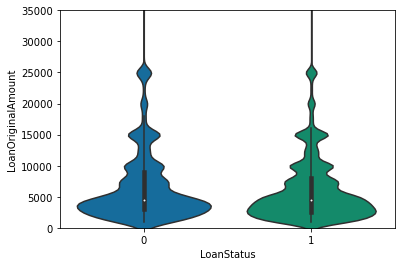

In [42]:
fig, ax = plt.subplots()

sns.violinplot(data=past, x='LoanStatus', y='LoanOriginalAmount').set_ylim([0,35000]);

The distribution of the loan amount seems to be consistent between both classes.

#### Borrower Rate

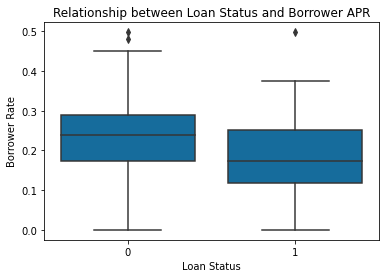

In [43]:
# Loan status vs Borrower APR

fig, ax = plt.subplots()

sns.boxplot(data=past, x='LoanStatus', y='BorrowerRate', color=color)
ax.set_title('Relationship between Loan Status and Borrower APR')
ax.set_ylabel('Borrower Rate')
ax.set_xlabel('Loan Status');

plt.show()

* Both classes have different rate distributions with the completed class having a lower median than the default class
* The default class has a wider range of borrower rates

#### Prosper Rating

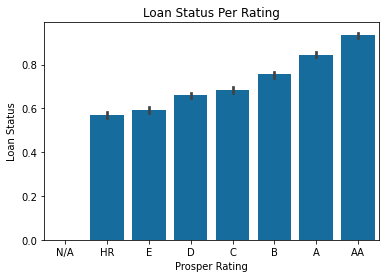

In [44]:
# loan Status vs  Prosper Rating (Alpha)

fig, ax = plt.subplots()

sns.barplot(data=past, y='LoanStatus', x='ProsperRating (Alpha)', color=color)
ax.set_title('Loan Status Per Rating')
ax.set_xlabel('Prosper Rating')
ax.set_ylabel('Loan Status');

plt.show()

In [45]:
# calculating the average default time per Rating

ratingHR, ratingE, ratingD, ratingC, ratingB, ratingA, ratingAA = past[past['ProsperRating (Alpha)'] == 'HR'], past[past['ProsperRating (Alpha)'] == 'E'], past[past['ProsperRating (Alpha)'] == 'D'], past[past['ProsperRating (Alpha)'] == 'C'], past[past['ProsperRating (Alpha)'] == 'B'], past[past['ProsperRating (Alpha)'] == 'A'], past[past['ProsperRating (Alpha)'] == 'AA']

round((1 - ratingHR['LoanStatus'].mean()) * 100, 2), round((1 - ratingE['LoanStatus'].mean()) * 100, 2), round((1 - ratingD['LoanStatus'].mean()) * 100, 2), round((1 - ratingC['LoanStatus'].mean()) * 100, 2),round((1 - ratingB['LoanStatus'].mean()) * 100, 2), round((1 - ratingA['LoanStatus'].mean()) * 100, 2), round((1 - ratingAA['LoanStatus'].mean()) * 100, 2)

(42.97, 40.85, 34.03, 31.47, 24.53, 15.62, 6.64)

From the figure, there's some variation in the default percentage. 
* Loans with the HR rating had defaults 42.97% of the time, 
* Loans with E rating had defaults 40.85% of the time, 
* Loans with the D rating had defaults 34.03% of the time
* Loans with the C rating had defaults 31.47% of the time
* Loans with the B rating had defaults 24.53% of the time
* Loans with the A rating had defaults 15.62% of the time
* Loans with the AA rating had defaults 6.64% of the time

We can safely say that the higher the rating, the less likely there is to be defaults

### Borrower Rate and its relationship with other features

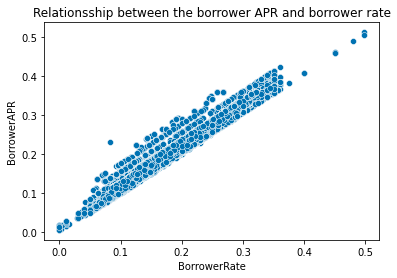

In [46]:
# Relationship between Borrower APR and Borrower Rate

sns.scatterplot(data = loans, x='BorrowerRate', y='BorrowerAPR', x_jitter = 0.3)
plt.title('Relationsship between the borrower APR and borrower rate');

There is a strong positive correlation between the APR and rate

#### Loan Amount

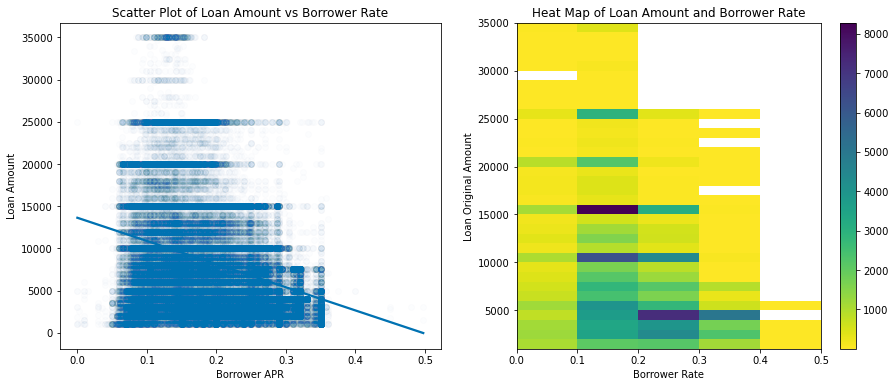

In [47]:
plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
#plt.scatter(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
sns.regplot(data = loans, x='BorrowerRate', y='LoanOriginalAmount', scatter_kws={'alpha':0.01})
plt.title('Scatter Plot of Loan Amount vs Borrower Rate')
plt.ylabel('Loan Amount')
plt.xlabel('Borrower APR');


plt.subplot(1, 2, 2)
bins_y = np.arange(loans['LoanOriginalAmount'].min(), loans['LoanOriginalAmount'].max()+1000, 1000)
bins_x = np.arange(loans['BorrowerRate'].min(), loans['BorrowerRate'].max()+0.1, 0.1)
plt.hist2d(data = loans, x='BorrowerRate', y='LoanOriginalAmount', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.title('Heat Map of Loan Amount and Borrower Rate')
plt.ylabel('Loan Original Amount')
plt.xlabel('Borrower Rate')
plt.colorbar();


The Borrower Rate has a large range with each loan amount size, but the Borrower Rate decreases with an increase in loan amount which is why there's a negative correlation.

#### Stated Monthly Income 

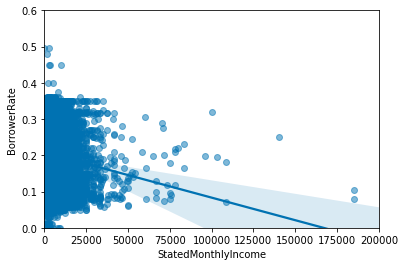

In [48]:
# Borrower Rate vs monthly income
sns.regplot(data=past, x='StatedMonthlyIncome', y='BorrowerRate', x_jitter = 0.3, scatter_kws={'alpha':0.5})
plt.xlim(0, 200000)
plt.ylim(0, 0.6);

* There is a negative correlation between the borrowers' monthly income and the loan rate. The rate decreases with an increase in income.

#### Listing Category 

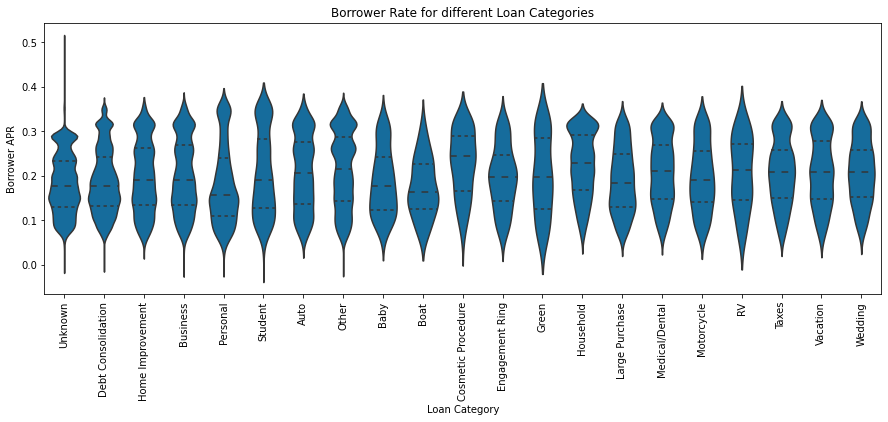

In [49]:
plt.figure(figsize = [15, 5]);
sns.violinplot(data=loans,x='ListingCategory', y='BorrowerRate', color=color, inner='quartile');
plt.title('Borrower Rate for different Loan Categories')
plt.xlabel('Loan Category');
plt.ylabel('Borrower APR');
plt.xticks(rotation = 90);

We can see that Cosmetic Procedures are given higer interest rates with well distributed data.

#### Loan Term

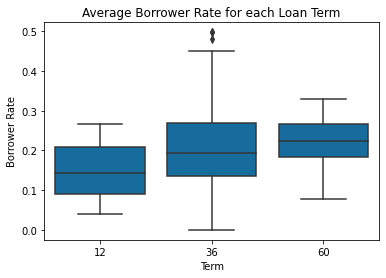

In [50]:
# box plot showing the Borrower Rate for each Term

sns.boxplot(data=past,y='BorrowerRate',x='Term',color=color)
plt.title('Average Borrower Rate for each Loan Term')
plt.ylabel('Borrower Rate')
plt.xlabel('Term');

As the term increases, the rate increases as well. The 36months term which has the most borrower count has a median rate of about 20%

### Relationship between Income/Income range and other variables 

#### Monthly loan Payment

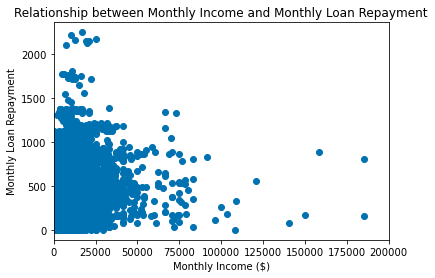

In [51]:
# monthly loan payment vs monthly income
plt.scatter(data = loans, x='StatedMonthlyIncome', y='MonthlyLoanPayment')
plt.xlim([0, 200000])
plt.title('Relationship between Monthly Income and Monthly Loan Repayment')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Repayment');

There's a positive correlation between monthly loan payment and the stated monthly income. 
High income earners pay back more every month than the low income earners

#### Estimated return

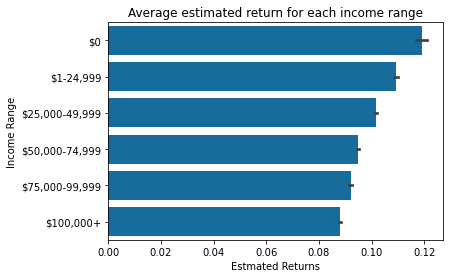

In [52]:
# income range vs estimated return

sns.barplot(data = loans, y='IncomeRange', x = 'EstimatedReturn', color=color)
plt.title('Average estimated return for each income range')
plt.ylabel('Income Range')
plt.xlabel('Estmated Returns');

There's a decrease in estimated returns with an increase in salary range
It Could be as a result of the negative correlation between the rates and monthly stated salary as noticed earlier 

#### Occupation

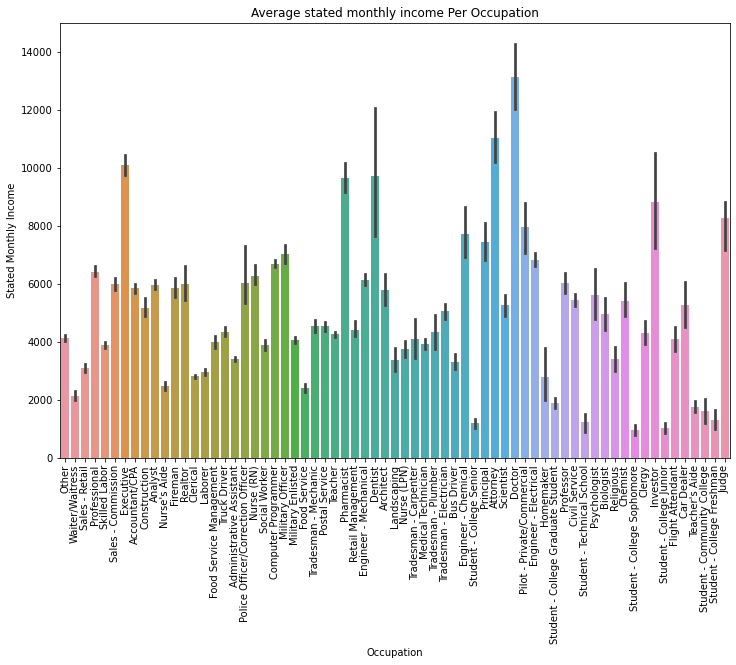

In [53]:
#Average monthly income for the top ten occupations
fig, ax = plt.subplots(figsize = (12, 8))

sns.barplot(data=past, y='StatedMonthlyIncome', x='Occupation')
ax.set_title('Average stated monthly income Per Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Stated Monthly Income')
plt.xticks(rotation=90);

plt.show()

Doctors, executives and attorneys earn the most but checking the distribution as shown earlier, professionals, executives and computer programmers had the most borrowing frequency

<Figure size 720x576 with 0 Axes>

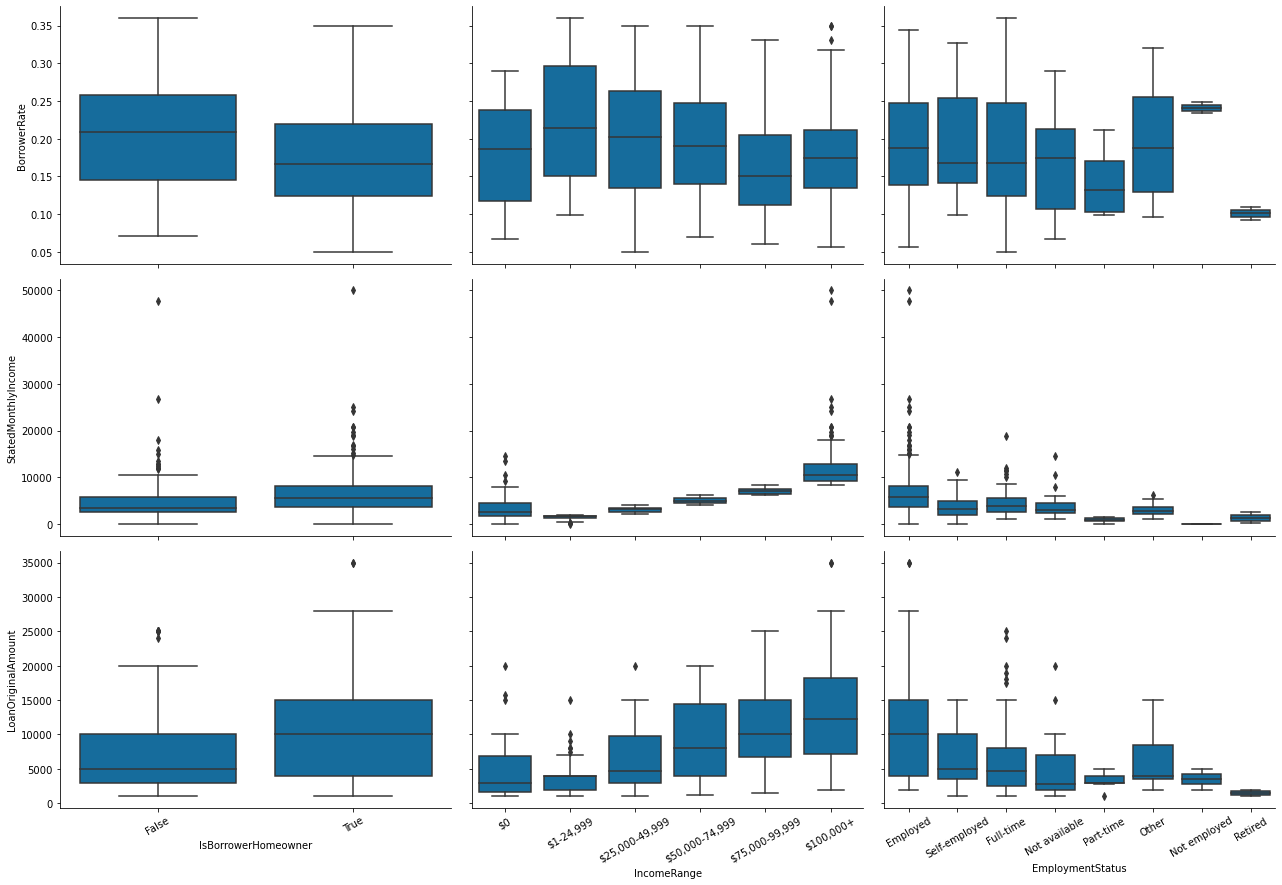

In [54]:
# Checking how borrower Rate, stated monthly income and loan original amount relate with some categorical variables by plotting a matrix.
cat = [ 'IsBorrowerHomeowner', 'IncomeRange', 'EmploymentStatus']

#define a function to create a box matrix
def customgrid(x, y, **kwargs):
    """ Creating a function for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation=30)

plt.figure(figsize = [10, 8]);
g = sns.PairGrid(data = loans_samp, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat, height = 4, aspect = 1.5)
g.map(customgrid)
plt.xticks(rotation=30);

From the figure, we can deduce the following
* Home owners who have a higher monthly income, take higher loans and have reduced interest rates on their loans than non home owners
* Borrowers with incomes ranging from ($)100,000 and above, have a wider IQR and median loan amount, with the lowest rates as well
* Self employed people take more high loan amounts and have a lesser monthly income than the employed ones but have a lesser mid rate than the emloyed
* The retired borrowers have the lowest rates 

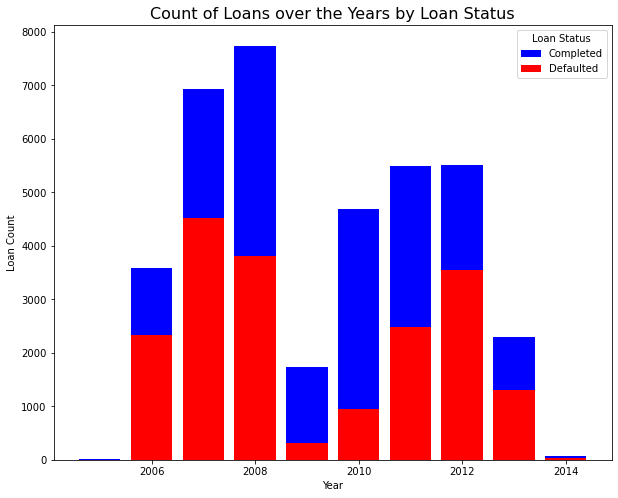

In [55]:
# plot showing the count of loans over the years with respect to the Status of the loan
fig, ax = plt.subplots(figsize=(10, 8))
completed = pd.DataFrame(loans.query("LoanStatus == 'Completed'").groupby(by='LoanOriginationYear').count())
ax.bar(completed.index, completed['LoanStatus'], color='blue')
defaulted = pd.DataFrame(loans.query("LoanStatus != 'Completed' and LoanStatus != 'Current'").groupby(by='LoanOriginationYear').count())
ax.bar(defaulted.index, defaulted['LoanStatus'], color='red')
ax.legend(labels=['Completed','Defaulted'], title ='Loan Status')
ax.set_title('Count of Loans over the Years by Loan Status', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Loan Count');

Comparing this plot with the plot of the overall count of loans per year, we can see that some of the loans from 2011 and above are currrent loans hence the low number. 

From 2005 - 2010, there were more completed loans than defaulted loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The loan status is affected by a large number of features as follows
* Both monthly income and debt to income ratio seem to have a relationship with default. People with higher stated monthly incomes defaulted less often than those with lower incomes, regardless of the size of the loan. Loans are more likely to default if the debt to income ratio is higher
* Looking at the several loan categories, the Green loans had the most defaults of about 56.5% while the RV loan accounted for about 11.11% default times which is the least
* The default class seemed to have higher rates
* After comparing the loan status to the rating, it was noticed that the higher the rating, the less likely there is to be defaults but from the distribution, the frequency of borrowing is highest in loans with a C rating

The relationship between the borrower rate was checked with the other features and we deduced the following from the data
* The Borrower Rate has a large range with each loan amount size, but the Borrower Rate decreases with an increase in loan amount which is why there's a negative correlation.
* There is also a negative correlation between the borrowers' monthly income and the loan rate. The rate decreases with an increase in income.
* From the rate comparison with the various listing categories, we can see that Cosmetic Procedure category is given a higer interest rate with well distributed data.
* When the average rates for each term were compared we saw that as the term increases, the rate increases as well. The 36months term which has the most borrower count has a median rate of about 20%

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013. After a bit of research, I discovered that it was due to the great recession which was a result of the global financial crisis
* There is a strong positive relationship between the term and loan amount ie longer the term, the larger the loan
* Most Borrowers are mostly employed with full time employment with monthly income ranging from ($)50,000 to 100,000+ and are mostly home owners. Their loans are usually within the 36months term
* There's a positive correlation between monthly loan payment and the stated monthly income. High income earners pay back more every month than the low income earners
* There's a decrease in estimated returns with an increase in salary range It Could be as a result of the negative correlation between the rates and monthly stated income as noticed earlier
* Doctors, executives and attorneys earn the most but checking the distribution as shown earlier, professionals, executives and computer programmers had the most borrowing frequency

## Multiivariate Exploration <a class="anchor" id="chapter4"></a>

In this section I will be investigating the data even further by creating plots with three or more variables.

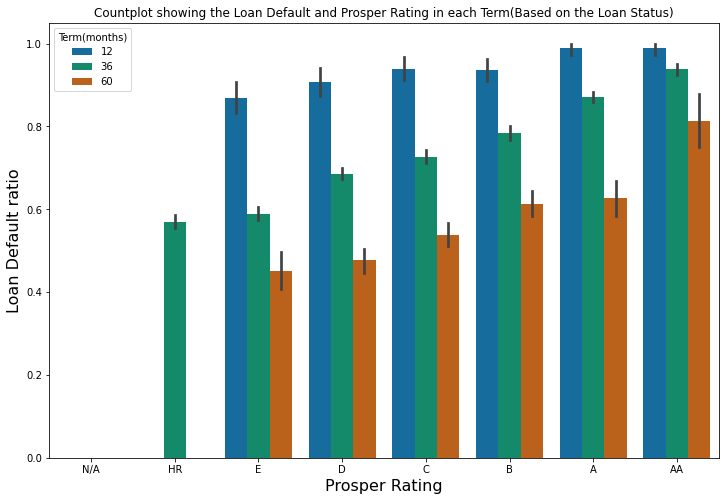

In [56]:
plt.figure(figsize = (12, 8))

sns.barplot(x='ProsperRating (Alpha)', y='LoanStatus', hue='Term', data=past)
plt.title("Countplot showing the Loan Default and Prosper Rating in each Term(Based on the Loan Status)")
plt.xlabel('Prosper Rating', fontsize=16)
plt.ylabel("Loan Default ratio", fontsize=16)
plt.legend(title ='Term(months)', loc='upper left');

There's a constant high likelihood of defaults with loans in the 60 months term irrespective of the Rating. The likelihood though of a default decreases as the rating progresses

The high risk loans are at a constant 36months term

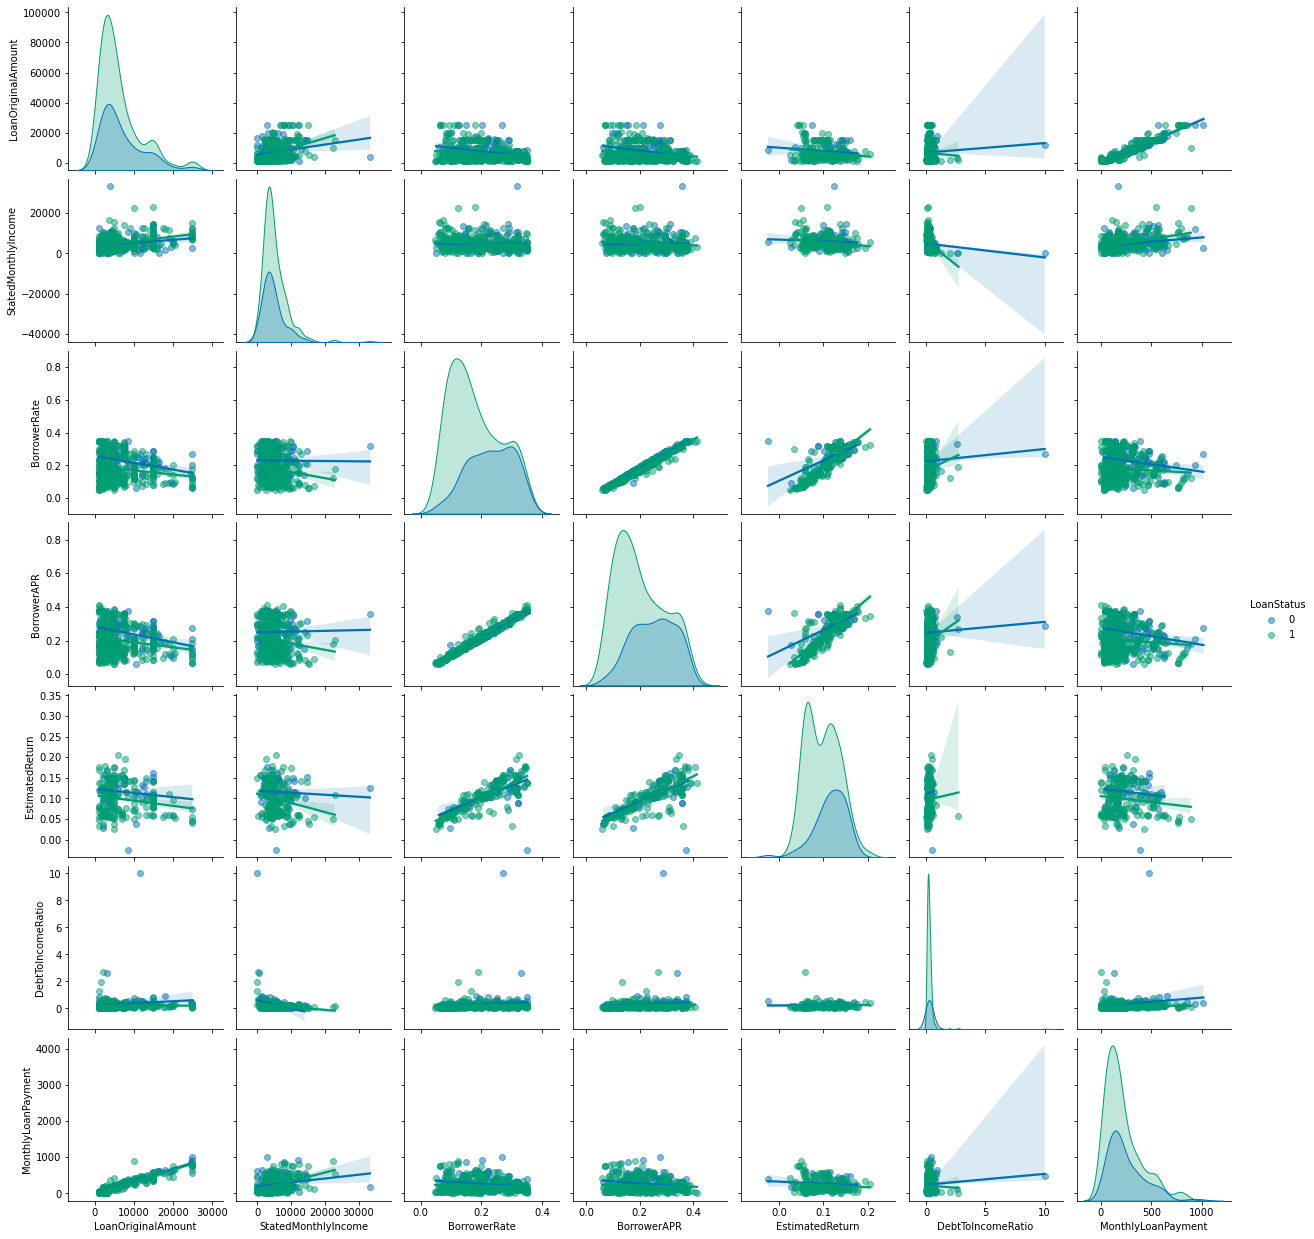

In [57]:
# Creating a sample of the subset with the encoded loan status
past_samp = past.sample(n=500, replace = False)
#plot_kws={'alpha': 0.5}
sns.pairplot(past_samp, vars=numeric_vars, kind ='reg', hue='LoanStatus', plot_kws={'scatter_kws':{'alpha': 0.5}});

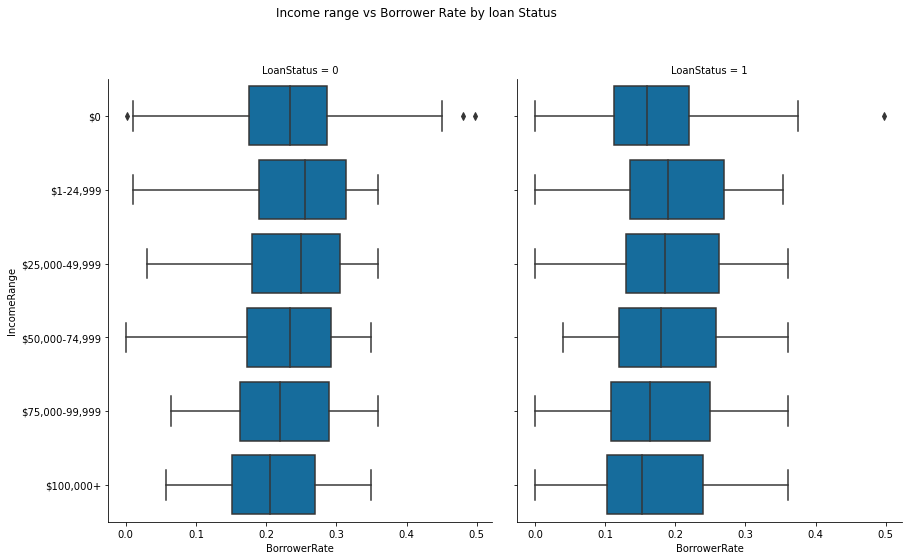

In [58]:
# investigating the effect of the income range and interest rate on the loan status
g= sns.FacetGrid(data= past, col = 'LoanStatus', height = 4)
g.map(sns.boxplot, 'BorrowerRate', 'IncomeRange')
plt.suptitle('Income range vs Borrower Rate by loan Status', y = 1.04)
g.fig.set_size_inches(14,8);

* The median rates for the completed loans are lower than rates for loans in the default class
* It is also noticed that the higher the income range the lower the interest rates

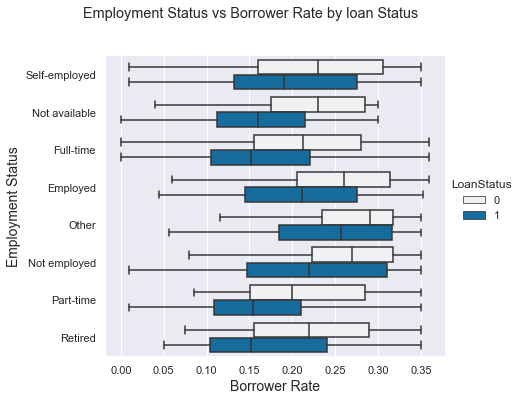

In [92]:
# investigating the effect of the employment and interest rate on the loan status

sns.catplot(x='BorrowerRate', y='EmploymentStatus', data=past, hue='LoanStatus', kind='box', color=color, ci='sd', sym="", height=5, aspect=1.3)
plt.suptitle('Employment Status vs Borrower Rate by loan Status', y = 1.1);
plt.xlabel('Borrower Rate', fontsize=14)
plt.ylabel('Employment Status', fontsize=14);

* The interest rate is not dependent on the employment status but the loan outcome is highly dependent on the interest rate. The lower the interest rate, the more likely the loan is to be completed

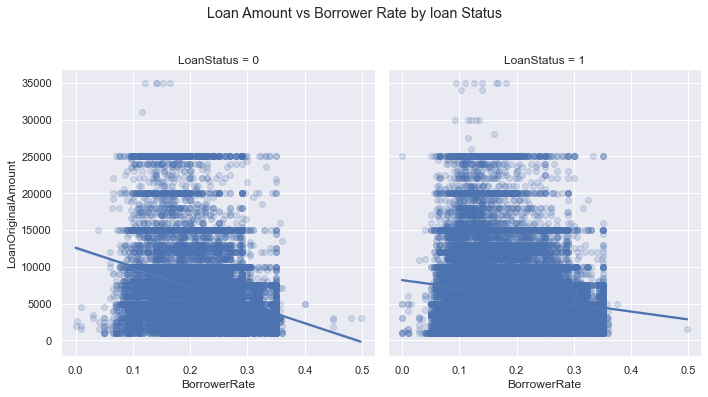

In [93]:
# investigating the effect of the Loan Amount and interest rate on the loan status

sns.lmplot(x='BorrowerRate', y='LoanOriginalAmount', data=past, col='LoanStatus', scatter_kws={'alpha':0.2})
plt.suptitle('Loan Amount vs Borrower Rate by loan Status', y = 1.1);

* The loan outcome is not dependent on the loan amount
* There is a weak negative correlation between the loan amount and the interest rate.  

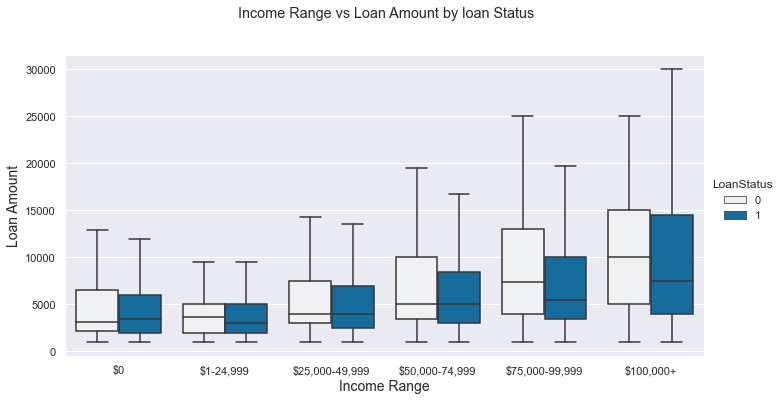

In [90]:
# investigating the effect of the income range and loan amount on the loan status

sns.catplot(y='LoanOriginalAmount', x='IncomeRange', data=past, hue='LoanStatus', kind='box', color=color, ci='sd', sym="", height=5, aspect=2)
plt.suptitle('Income Range vs Loan Amount by loan Status', y = 1.1)
plt.xlabel('Income Range', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14);



* We can see that the more money people earn, the more money they borrow
* Under the default class, the median loan amount between the 75,000 - 100,000+ is more than the completed loans

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* There's a constant high likelihood of defaults with loans in the 60 months term irrespective of the Rating. The likelihood though of a default decreases as the rating progresses and the high risk loans are at a constant 36months term
* The median rates for the completed loans are lower than rates for loans in the default class and it is also noticed that the higher the income range the lower the interest rates
* The interest rate is not dependent on the employment status but the loan outcome is highly dependent on the interest rate. The lower the interest rate, the more likely the loan is to be completed
* The loan outcome is not dependent on the loan amount
* There is a weak negative correlation between the loan amount and the interest rate.

### Were there any interesting or surprising interactions between features?

* The Loan outcome is highly dependent on the interest rate and doesn't factor in the employment status, occupation or income
* The more money people earn, the more money they borrow


## Conclusion <a class="anchor" id="chapter5"></a>


In the Monthly Income distribution, the maximum value was unusually high and when compared to the loan amount it seemed to require more investigation but we do not have any supporting data and I assume it was a computational error. 2013 had the highest loans taken out with most of the loans falling in the 36 months term and California (CA) had the biggest number of loans borrowers.
There were some features with long-tailed and skewed distributions but they were checked on a log scale to show the hidden distribution in some areas.

Since the aim of the analysis was to find out the effect of the features of interest on the loan status, I filtered out the current loans and worked with loans that were tagged default and the completed loans. Both monthly income and debt to income ratio seemed to have a relationship with default. People with higher stated monthly incomes defaulted less often than those with lower incomes, regardless of the size of the loan. It was also noticed that loans are more likely to default if the debt to income ratio is higher.

Looking at the several loan categories, the Green loans had the most defaults of about 56.5% while the RV loan accounted for about 11.11% default times which is the least, the default class seemed to have higher rates and after comparing the loan status to the rating, it was noticed that the higher the rating, the less likely there is to be defaults but from the distribution, the frequency of borrowing is highest in loans with a C rating.

After the relationship of borrower rate was checked with other features, It was noticed that the borrower Rate has a large range with each loan amount size, but the Borrower Rate decreases with an increase in loan amount which is why there's a negative correlation, there is also a negative correlation between the borrowers' monthly income and the loan rate. The rate decreases with an increase in income.
From the rate comparison with the various listing categories, we can see that Cosmetic Procedure category is given a higer interest rate with well distributed data.

When the average rates for each term were compared, we saw that as the term increases, the rate increases as well. The 36months term which has the most borrower count has a median rate of about 20%. It was also observed that in 2008-2009 there was a large dip in loan origination that had a slow rise till it peaked in 2013. After a bit of research, I discovered that it was due to the great recession which was a result of the global financial crisis. There is a strong positive relationship between the term and loan amount ie longer the term, the larger the loan.
Most Borrowers are mostly employed with full time employment with monthly income ranging from 50,000 to 100,000+ and are mostly home owners. Their loans are usually within the 36months term.
There's a decrease in estimated returns with an increase in salary range which could be as a result of the negative correlation between the rates and monthly stated income as noticed earlier.


There's a constant high likelihood of defaults with loans in the 60 months term irrespective of the Rating. The likelihood though of a default decreases as the rating progresses and the high risk loans are at a constant 36months term
The median rates for the completed loans are lower than rates for loans in the default class and it is also noticed that the higher the income range the lower the interest rates
The interest rate is not dependent on the employment status but the loan outcome is highly dependent on the interest rate. The lower the interest rate, the more likely the loan is to be completed
The loan outcome is not dependent on the loan amount
There is a weak negative correlation between the loan amount and the interest rate.

The overall conclusion is that the Loan outcome is highly dependent on the interest rate and doesn't factor in the employment status, occupation or income and the more money people earn, the more money they borrow

The biggest challenge with this project was figuring out what features to assess from the wide array of variables. towardsdatascience.com and kaggle were referenced for some guidance.